In [1]:
import gym # para elegir el ambiente en el cual entrenaremos el agente.
import sys

import pandas as pd # para disponer de la data de forma mas organizada.
import matplotlib.pyplot as plt # para mostrar gráficos.
import numpy as np #para el procesamiento de números.

np.random.seed(777)

%matplotlib inline

from collections import defaultdict #utilizaremos un defaultdict como base
# en la cual guardaremos el valor que tendrá cada una de nuestras acciones. 
from utils import e_greedy

In [2]:
env = gym.make('FrozenLake-v0') #este es el ambiente que utilizaremos,
# puedes buscar como funciona en la documentación.

In [3]:
numero_de_acciones = env.action_space.n
Q = defaultdict(lambda: np.zeros(numero_de_acciones)) #se define nuestra base como un diccionario anidado con cada acción 
#que podría tomar el agente.


decay = 0.0000042
decay = 1 - decay #este valor será por el cual decaerá nuestro epsilon en cada episodio. 

alpha = 0.01 #nuestro valor de "media movil" se verá afectado por esta variable. 

episode = 0
counter_state_actions = set() #esta variable almacenará cada que accion se realice por cada episodio.
total_reward = 0
constante = epsilon = 1 # valor de epsilon inicial
obs = env.reset() #inicia el ambiente
eps_list = list() #variable que almacenará los valores de epsilon.
reward_list = [] #variable que almacenará los valores de recompensa.

In [4]:
for numb_iter in range(1, 1200001):
    episode += 1
    while True:   
        actions_prob = e_greedy(Q, epsilon, numero_de_acciones, obs) #variable que almacenará la probabilidad de realizar cada acción. 
        selected_action = np.argmax(np.random.multinomial(1, actions_prob)) #se elige la acción de acuerdo a las probabilidades que ocurran.
        counter_state_actions.add((obs, selected_action)) #se agrega la acción y el estado en donde se encuentra  
        obs, temporal_reward, final, _ = env.step(selected_action)      
        total_reward += temporal_reward
        if final:
            if episode % 100000 == 0:
                print(f'Número de Episodios Realizados: {episode}')         
            for ob, ac in counter_state_actions:
                Q[ob][ac] += alpha* (total_reward - Q[ob][ac]) #se actualiza el valor de cada acción en cada estado que estuvo involucrado.
            eps_list.append(epsilon)
            epsilon= constante*decay**episode #decae epsilon
            obs = env.reset() 
            reward_list.append(total_reward)
            total_reward = 0
            counter_state_actions = set()
            break

Número de Episodios Realizados: 100000
Número de Episodios Realizados: 200000
Número de Episodios Realizados: 300000
Número de Episodios Realizados: 400000
Número de Episodios Realizados: 500000
Número de Episodios Realizados: 600000
Número de Episodios Realizados: 700000
Número de Episodios Realizados: 800000
Número de Episodios Realizados: 900000
Número de Episodios Realizados: 1000000
Número de Episodios Realizados: 1100000
Número de Episodios Realizados: 1200000


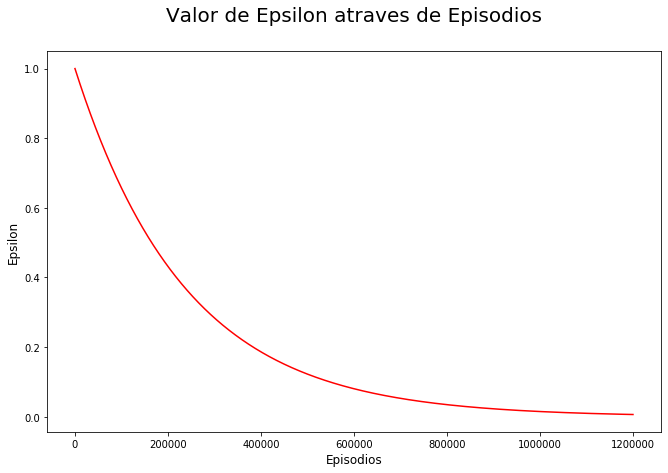

In [5]:
plt.figure(figsize=(11,7)) 
plt.title('Valor de Epsilon atraves de Episodios', fontsize=20, pad=30)
plt.xlabel('Episodios', fontsize=12)
plt.ylabel('Epsilon', fontsize=12)
plt.plot(eps_list, color='r')

In [6]:
df = pd.DataFrame({'Reward': reward_list})

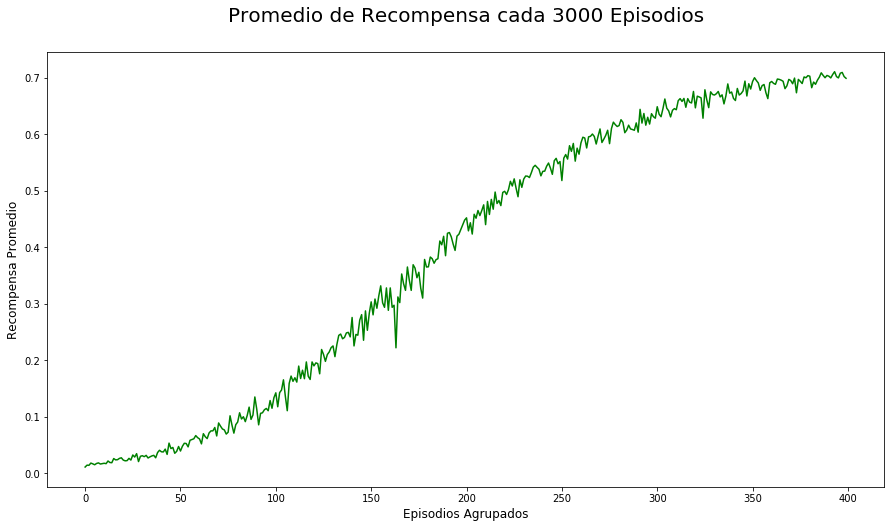

In [7]:
plt.figure(figsize=(15,8)) 
plt.title('Promedio de Recompensa cada 3000 Episodios', fontsize=20, pad=30)
plt.xlabel('Episodios Agrupados', fontsize=12)
plt.ylabel('Recompensa Promedio', fontsize=12)
plt.plot(df.groupby(df.index //3000)['Reward'].mean(), color='g')

In [8]:
Q

defaultdict(<function __main__.<lambda>()>,
            {0: array([0.75663641, 0.62489172, 0.58001164, 0.53870692]),
             1: array([0.29350254, 0.28745996, 0.31270873, 0.52220912]),
             2: array([0.35215546, 0.35931352, 0.29243874, 0.51841595]),
             3: array([0.24315723, 0.25989671, 0.23380249, 0.46756724]),
             4: array([0.75783209, 0.4484457 , 0.45834466, 0.39673825]),
             8: array([0.45219702, 0.46251652, 0.43738656, 0.76203687]),
             9: array([0.45702638, 0.76366491, 0.50456328, 0.44948271]),
             6: array([0.36362135, 0.24138187, 0.26961976, 0.13084354]),
             10: array([0.67729526, 0.47964196, 0.38994656, 0.34863304]),
             13: array([0.45361518, 0.51463886, 0.7840618 , 0.4771371 ]),
             14: array([0.75082922, 0.89227793, 0.80906784, 0.78993933])})